<a href="https://colab.research.google.com/github/HEON-WOOK/Portfolio2/blob/main/%EB%B6%84%EB%A5%98%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
print(fish)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


In [ ]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish_input = fish[['Weight','Length', 'Diagonal', 'Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target =train_test_split(fish_input,fish_target,random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
kn.score(train_scaled,train_target)
kn.score(test_scaled,test_target)


0.85

In [14]:
print(kn.classes_)
print(kn.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [18]:
import numpy as np
proba = kn.predict_proba(test_scaled[0:5])
print(np.round(proba,decimals = 2))

[[0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.67 0.   0.33 0.   0.  ]
 [0.   0.   0.67 0.   0.33 0.   0.  ]]


In [25]:
distances,indexes = kn.kneighbors(test_scaled[3:4])
print(distances,indexes)
print(train_target[indexes])

[[0.20774583 0.24862983 0.33682411]] [[104 115 106]]
[['Roach' 'Perch' 'Perch']]


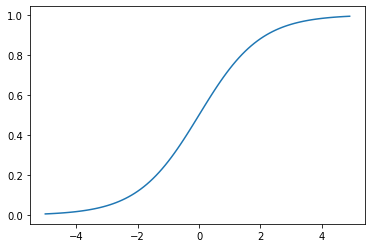

In [27]:
# 로지스틱 회귀
# 시그모이드 함수를 이용
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.show()

In [31]:
# 로지스틱 회귀로 이진 분류 수행하기
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

['A' 'C']


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)
lr.predict(train_bream_smelt)

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [44]:
np.round(lr.predict_proba(train_bream_smelt),decimals=3)

array([[0.998, 0.002],
       [0.027, 0.973],
       [0.995, 0.005],
       [0.986, 0.014],
       [0.998, 0.002],
       [0.032, 0.968],
       [0.973, 0.027],
       [1.   , 0.   ],
       [0.987, 0.013],
       [0.902, 0.098],
       [0.998, 0.002],
       [0.998, 0.002],
       [0.997, 0.003],
       [0.038, 0.962],
       [1.   , 0.   ],
       [0.033, 0.967],
       [0.075, 0.925],
       [0.98 , 0.02 ],
       [0.999, 0.001],
       [0.971, 0.029],
       [0.982, 0.018],
       [0.985, 0.015],
       [0.963, 0.037],
       [0.993, 0.007],
       [0.986, 0.014],
       [0.04 , 0.96 ],
       [0.996, 0.004],
       [0.034, 0.966],
       [0.032, 0.968],
       [0.941, 0.059],
       [0.077, 0.923],
       [0.995, 0.005],
       [0.992, 0.008]])

In [45]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [55]:
decisions = lr.decision_function(train_bream_smelt[0:5])
print(decisions)

from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [62]:
lr =LogisticRegression(C=20,max_iter=1000) # C  계수제곱 규제 , max_iter = 알고리즘 반복 횟수
lr.fit (train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

print(lr.predict(test_scaled))
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike' 'Bream' 'Perch' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch' 'Perch'
 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch'
 'Roach' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch'
 'Roach' 'Roach' 'Parkki' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [69]:
# 시그모이드의 소프트 맥스 적용

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
